In [ ]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(42)

# Cluster 1: Low CGPA & IQ
cgpa1 = np.random.normal(2.3, 0.15, 30)   # around 2.3
iq1   = np.random.normal(88, 4, 30)       # around 88

# Cluster 2: Medium CGPA & IQ
cgpa2 = np.random.normal(3.2, 0.15, 35)   # around 3.2
iq2   = np.random.normal(105, 5, 35)      # around 105

# Cluster 3: High CGPA & IQ
cgpa3 = np.random.normal(3.8, 0.1, 35)    # around 3.8
iq3   = np.random.normal(118, 3, 35)      # around 118

# Combine all clusters
CGPA = np.concatenate([cgpa1, cgpa2, cgpa3])
IQ   = np.concatenate([iq1, iq2, iq3])
students = [f"S{i}" for i in range(1, len(CGPA)+1)]

# Create DataFrame
df = pd.DataFrame({"Student": students, "CGPA": CGPA, "IQ": IQ})
print(df.head(10))


  Student      CGPA         IQ
0      S1  2.374507  85.593174
1      S2  2.279260  95.409113
2      S3  2.397153  87.946011
3      S4  2.528454  83.769156
4      S5  2.264877  91.290180
5      S6  2.264879  83.116625
6      S7  2.536882  88.835454
7      S8  2.415115  80.161320
8      S9  2.229579  82.687256
9     S10  2.381384  88.787445


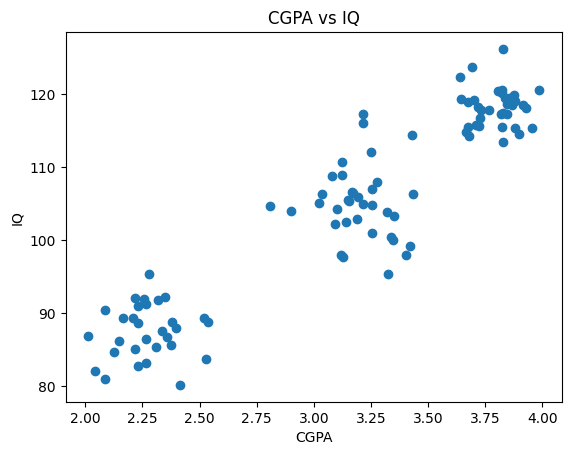

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df['CGPA'], df['IQ'])
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('CGPA vs IQ')
plt.show()

In [ ]:
## checking the clusters
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df[['CGPA','IQ']])
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[16721.58467138151,
 3806.0069176157904,
 1102.0725681723272,
 785.0869908804237,
 638.6084812796797,
 459.9660857233083,
 297.72181707270636,
 243.1075032669695,
 173.77305608261597,
 143.70516817251305]

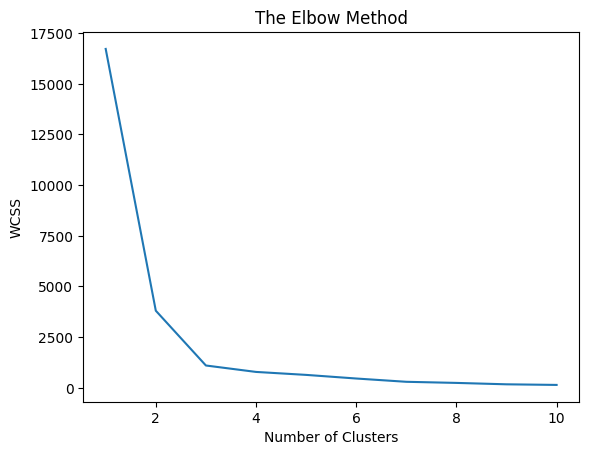

In [ ]:
## plotting it
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
x=df[['CGPA','IQ']].values
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans.fit_predict(x)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

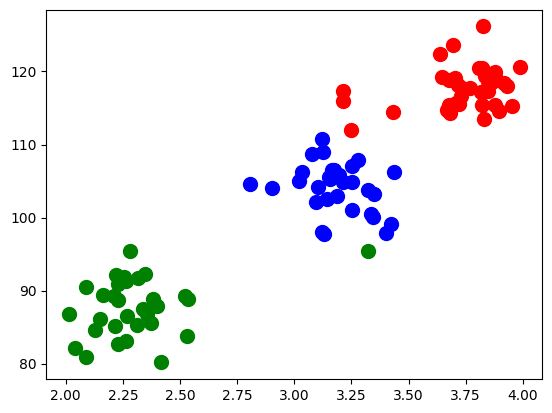

In [ ]:
plt.scatter(x[kmeans.labels_==0,0],x[kmeans.labels_==0,1],s=100,c='blue',label='Cluster 1')
plt.scatter(x[kmeans.labels_==1,0],x[kmeans.labels_==1,1],s=100,c='red',label='Cluster 1')
plt.scatter(x[kmeans.labels_==2,0],x[kmeans.labels_==2,1],s=100,c='green',label='Cluster 1')
